# Setup



In [76]:
using Plots
using FFTW

include("spinning_compass_functions.jl");

# Compass in a magnetic field



Trajectories in Time domain

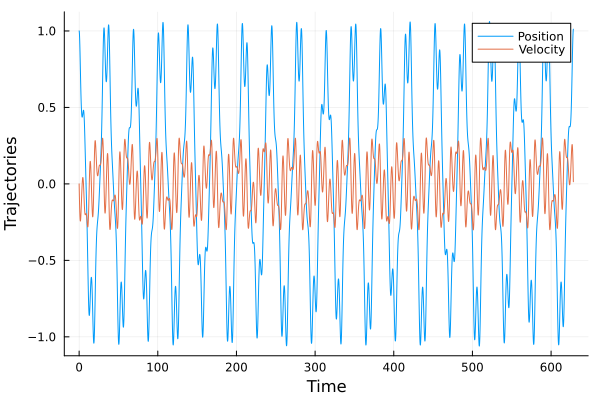

In [2]:
# Function parameters
B = 0.3
ω = 1.0
drive_period = 2*π / ω

# Simulation parameters
t_initial, t_final = 0.0, 100*drive_period
Nsteps = 10000
time_param = (t_initial, t_final, Nsteps)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]


f(r, t) = Spin_compass.EOM_compass(r, t, B, ω)

(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);




plot(tpoints, xpoints, label="Position")
plot!(tpoints, vpoints, label="Velocity")

xlabel!("Time")
ylabel!("Trajectories")


Phase Space trajectories

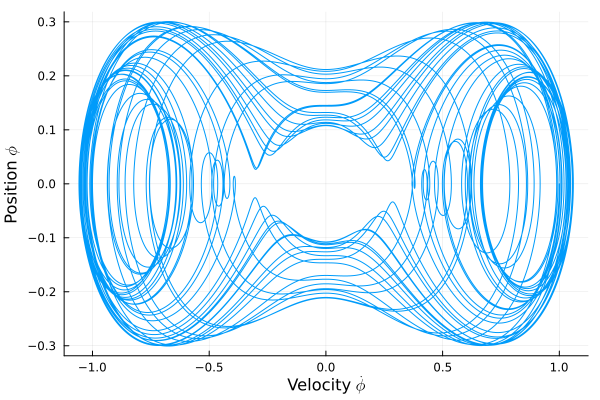

In [3]:
# Function parameters
B = 0.3
ω = 1.0
drive_period = 2*π / ω

# Simulation parameters
t_initial, t_final = 0.0, 100*drive_period
Nsteps = 20000
time_param = (t_initial, t_final, Nsteps)


# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]

# Function parameters
B = 0.3
ω = 1.0
f(r, t) = Spin_compass.EOM_compass(r, t, B, ω)

(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);



plot(xpoints, vpoints, label="")

xlabel!(raw"Velocity $\dot\phi$")
ylabel!(raw"Position $\phi$")


# Harmonic oscillator

- Intended for testing the RK4 code  



In [4]:
function hooke(r, t, k)
    (x, v) = r
    dxdt = v
    dvdt = -k*x
    return [dxdt, dvdt]
end

hooke (generic function with 1 method)

Sample Dynamics of Oscillator

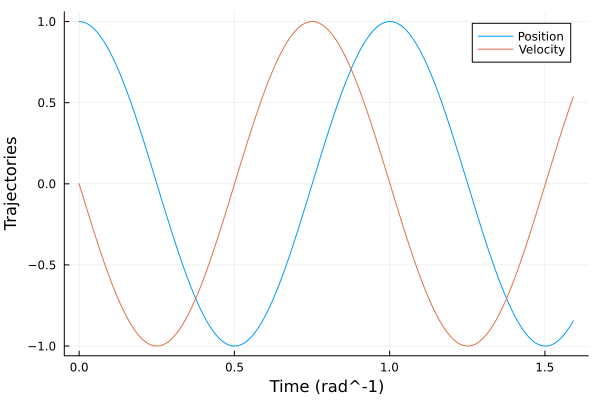

In [78]:
# Simulation parameters
t_initial, t_final = 0.0, 10.0
Nsteps = 1000
time_param = (t_initial, t_final, Nsteps)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]

# Function parameters
k = 1.0
f(r, t) = hooke(r, t, k)

(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);



plot(tpoints.*(1 / (2*π)) , xpoints, label="Position")
plot!(tpoints.*(1 / (2*π)), vpoints, label="Velocity")

xlabel!("Time (rad^-1)")
ylabel!("Trajectories")

#### FFT SPectrum
For calculating the Fourier spectrum of a single trajectory, make sure that $t_{final}$ is an integer multiple of the driving period or the natural frequency. This is to avoid aliasing and we have sufficient points for the FFT. -Roy

Sample of FFT Frequency spectrum of Hooke spring.

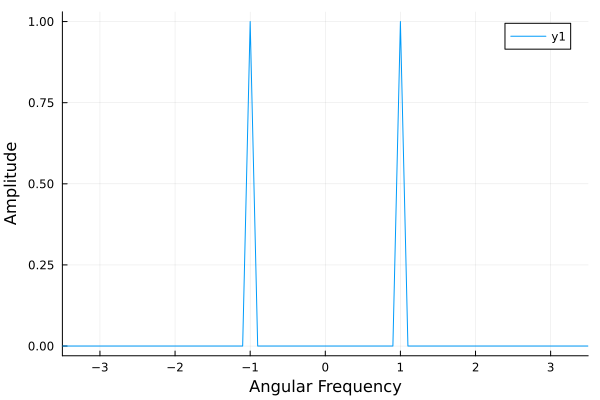

In [83]:

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]


# Function parameters
k = 1.0
f(r, t) = hooke(r, t, k)


# Simulation parameters
t_initial, t_final = 0.0, 10 * (2*π) / k^0.5
Nsteps = 1001
time_param = (t_initial, t_final, Nsteps)
sampling_rate = Nsteps / abs(t_final - t_initial)



(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);

fourier_xpoints = fftshift(fft(xpoints))
fourier_freq = fftshift(fftfreq(Nsteps, sampling_rate)).*(2*π) #conversion of hertz to rad

plot(fourier_freq, normalized_power, xlims = (-3.5, 3.5))
xlabel!("Angular Frequency")
ylabel!("Amplitude")



Calculation of Spectral entropy

In [85]:
#run the cell above before running
#calculation of spectral entropy
power_xpoints = abs.(fourier_xpoints).^2
power_total = sum(power_xpoints)
normalized_power = (power_xpoints./power_total).*2 
#the two is on the normalized power to make the spectral entropy zero for clean oscillations


spec_entropy = 0
for i in 1:length(normalized_power)
    if normalized_power[i] > 1e-5
        spec_entropy += normalized_power[i]*log2(normalized_power[i])
    else
        spec_entropy += 0
    end
end
spec_entropy /= -2 * log2(length(normalized_power))

println("Spectral Entropy: ", spec_entropy)

Spectral Entropy: 7.949729695500856e-13
